In [3]:
import pandas as pd
import numpy as np

path = '/Users/GS7271/Documents/COESIA/'

wpdtc = pd.read_csv(path + 'WPDTC_20180214.csv')

wpdtc.tail(10)

,Plant,Vendor,Name,MRP,Ty,MTyp,Material,Description,StdCost,PDT,CPDT,Delta
33419,RA01,1007252,ATR DISTRIBUTING COMPANY,Z002,PD,Z004,WTI1826660000,"CABLE GLAND,PLASTIC,PART DESIGNATION:",$9.66,14.0,6,-8
33420,RA01,1007252,ATR DISTRIBUTING COMPANY,Z002,PD,Z004,WTI4567.0,"JUMPER UNIT,Q2 OEM: WEIDMULLER TERMINATI",$2.06,10.0,18,8
33421,RA01,1007447,RILCO INDUSTRIAL CONTROLS,Z002,PD,Z004,WTIPK2/4-W,LETTER W FOR PKH ENGRAVED WITH LETTER,$0.03,25.0,26,1
33422,RA01,1007447,RILCO INDUSTRIAL CONTROLS,Z002,PD,Z004,WTIPK2/4-X,LETTER X FOR PKH ENGRAVED WITH LETTER,$0.04,25.0,24,-1
33423,RA01,1007252,ATR DISTRIBUTING COMPANY,Z002,PD,Z004,WTIPKH070,"CONDUCTOR MARKER BLACK,70MM LONG FOR 10",$0.39,10.0,7,-3
33424,RA01,1007267,C and E SALES INC,Z002,PD,Z004,YAMY-CONPLUG-21,"PLUG KIT,CONNECTOR,IP20 RJ45 INCLUDING 2",$16.90,91.0,6,-85
33425,RA01,1007403,"NEWACT, INC.",Z002,PD,Z003,YPC25020SR12-9,"INSERT,.250-20 X .300IN,HEADLESS,BARBED",$1.23,24.0,0,-24
33426,RA01,1007584,YARDLEY BRASS PRODUCTS,Z002,PD,Z003,YPC25020SR12-9,"INSERT,.250-20 X .300IN,HEADLESS,BARBED",$1.23,24.0,5,-19
33427,RA01,30007,VOLPAK S.A.,Z002,PD,Z005,Z0100400450,FUELLE PALANCAS 20x8,$1.43,28.0,43,15
33428,RA01,1007455,INDUSTRIAL DISTRIBUTIONS,Z002,PD,Z003,ZER6707,"COUPLING,22 H7 BORE X .750IN BORE,SINGLE",$284.52,37.0,10,-27


    Eliminate special characters in the Material Description field

In [5]:
import re
wpdtc.Description = wpdtc.Description.apply(lambda x: re.sub('\W+',' ', x))

In [6]:
wpdtc.tail(10)

,Plant,Vendor,Name,MRP,Ty,MTyp,Material,Description,StdCost,PDT,CPDT,Delta
33419,RA01,1007252,ATR DISTRIBUTING COMPANY,Z002,PD,Z004,WTI1826660000,CABLE GLAND PLASTIC PART DESIGNATION,$9.66,14.0,6,-8
33420,RA01,1007252,ATR DISTRIBUTING COMPANY,Z002,PD,Z004,WTI4567.0,JUMPER UNIT Q2 OEM WEIDMULLER TERMINATI,$2.06,10.0,18,8
33421,RA01,1007447,RILCO INDUSTRIAL CONTROLS,Z002,PD,Z004,WTIPK2/4-W,LETTER W FOR PKH ENGRAVED WITH LETTER,$0.03,25.0,26,1
33422,RA01,1007447,RILCO INDUSTRIAL CONTROLS,Z002,PD,Z004,WTIPK2/4-X,LETTER X FOR PKH ENGRAVED WITH LETTER,$0.04,25.0,24,-1
33423,RA01,1007252,ATR DISTRIBUTING COMPANY,Z002,PD,Z004,WTIPKH070,CONDUCTOR MARKER BLACK 70MM LONG FOR 10,$0.39,10.0,7,-3
33424,RA01,1007267,C and E SALES INC,Z002,PD,Z004,YAMY-CONPLUG-21,PLUG KIT CONNECTOR IP20 RJ45 INCLUDING 2,$16.90,91.0,6,-85
33425,RA01,1007403,"NEWACT, INC.",Z002,PD,Z003,YPC25020SR12-9,INSERT 250 20 X 300IN HEADLESS BARBED,$1.23,24.0,0,-24
33426,RA01,1007584,YARDLEY BRASS PRODUCTS,Z002,PD,Z003,YPC25020SR12-9,INSERT 250 20 X 300IN HEADLESS BARBED,$1.23,24.0,5,-19
33427,RA01,30007,VOLPAK S.A.,Z002,PD,Z005,Z0100400450,FUELLE PALANCAS 20x8,$1.43,28.0,43,15
33428,RA01,1007455,INDUSTRIAL DISTRIBUTIONS,Z002,PD,Z003,ZER6707,COUPLING 22 H7 BORE X 750IN BORE SINGLE,$284.52,37.0,10,-27


In [7]:
MatDesc_WordFreq = wpdtc.Description.apply(lambda x: pd.value_counts(x.
                                                                              replace('0',' ').
                                                                              replace('1',' ').
                                                                              replace('2',' ').
                                                                              replace('3',' ').
                                                                              replace('4',' ').
                                                                              replace('5',' ').
                                                                              replace('6',' ').
                                                                              replace('7',' ').
                                                                              replace('8',' ').
                                                                              replace('9',' ').
                                                                              split(" "))).sum(axis = 0)
DescFreq = MatDesc_WordFreq.to_frame().reset_index()
DescFreq.columns = ['word', 'frequency']
DescFreq.head(10)

,word,frequency
0,,107827.0
1,A,763.0
2,AA,3.0
3,AAC,1.0
4,AB,17.0
5,ABB,23.0
6,ABBMPL,1.0
7,ABERTUR,1.0
8,ABERTURA,3.0
9,ABK,1.0


In [8]:
DescFreq.sort_values('frequency', ascending=False)

,word,frequency
0,,107827.0
5654,X,4480.0
2311,IN,2712.0
3111,MM,2104.0
4462,SHAFT,1909.0
3703,PLATE,1859.0
2926,M,1846.0
4661,SPACER,1517.0
427,BLOCK,1438.0
4743,SS,1336.0


In [9]:
DescFreq.to_csv('DescFreq.csv', encoding = 'utf-8')

In [10]:
Top1000Desc = pd.read_csv(path + 'CommonDesc.csv')

Top1000Desc.tail(10)

,word,frequency
990,SHAPE,14
991,SHELF,14
992,GASSER,14
993,GUIDED,14
994,JUMPER,14
995,LUMBER,14
996,SERCOS,14
997,SPLICE,14
998,STATIC,14
999,CARBIDE,14


In [37]:
CommonWords = Top1000Desc['word'].str.lower()

CommonWords.head()

0     shaft
1     plate
2    spacer
3     block
4     chain
Name: word, dtype: object

In [11]:
wpdtc.dtypes

Plant           object
Vendor           int64
Name            object
MRP             object
Ty              object
MTyp            object
Material        object
Description     object
StdCost         object
PDT            float64
CPDT             int64
Delta            int64
dtype: object

In [71]:
wpdtc.dropna()

,Plant,Vendor,Name,MRP,Ty,MTyp,Material,Description,StdCost,PDT,CPDT,Delta
0,RA02,1008371,"GARDNER ENGINEERING, INC.",Z002,ZV,Z005,007-00103-000,KNOCK OUT PUNCH PIN,$21.94,25.0,1,-24
1,RA02,1008371,"GARDNER ENGINEERING, INC.",Z002,PD,Z005,007-00104-000,KNIFE PIN,$25.00,25.0,10,-15
2,RA02,1008371,"GARDNER ENGINEERING, INC.",Z002,PD,Z005,007-00105-000,KO PUNCH HOLDER,$165.49,25.0,10,-15
3,RA02,1008371,"GARDNER ENGINEERING, INC.",Z002,PD,Z005,007-00107-000,BOTTOM PLATE PUNCH HOLDER,$20.00,8.0,7,-1
4,RA02,1007679,"B & D Machinists, INC",Z002,ZV,Z005,007-00112-000,PLATE PIN,$45.00,20.0,11,-9
5,RA02,1008496,"PRODUCTION TOOL CO., INC.",Z002,PD,Z005,007-00121-000,KNIFE 1 HOLE,$133.20,53.0,8,-45
6,RA02,1008371,"GARDNER ENGINEERING, INC.",Z002,PD,Z005,007-00123-000,SPRING BLOCK K O PUNCH,$88.00,8.0,1,-7
7,RA02,1008487,GETT INDUSTRIES LTD.,Z002,PD,Z005,007-00146-010,V I S L H CAM BLANK,"$1,740.00",49.0,2,-47
8,RA02,1007817,Larco Industrial,Z002,PD,Z005,007-00207-000,LEVER CONNECTING PIN,$25.00,8.0,16,8
9,RA02,1007817,Larco Industrial,Z002,ZV,Z005,007-00209-010,SPACER ELEVATING CAM YOKE,$9.50,49.0,21,-28


In [73]:
wpdtc.isnull()

,Plant,Vendor,Name,MRP,Ty,MTyp,Material,Description,StdCost,PDT,CPDT,Delta
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
nominal_features = ['Plant', 'Vendor', 'MRP', 'Ty', 'MTyp']

one_hot_df = pd.concat([pd.get_dummies(wpdtc[col], prefix = col) for col in nominal_features], axis = 1)

one_hot_df.tail()

df = pd.concat([wpdtc, one_hot_df], axis = 1)

In [13]:
df.tail()

,Plant,Vendor,Name,MRP,Ty,MTyp,Material,Description,StdCost,PDT,...,MTyp_Z002,MTyp_Z003,MTyp_Z004,MTyp_Z005,MTyp_Z006,MTyp_Z007,MTyp_Z008,MTyp_Z010,MTyp_Z011,MTyp_Z023
33424,RA01,1007267,C and E SALES INC,Z002,PD,Z004,YAMY-CONPLUG-21,PLUG KIT CONNECTOR IP20 RJ45 INCLUDING 2,$16.90,91.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33425,RA01,1007403,"NEWACT, INC.",Z002,PD,Z003,YPC25020SR12-9,INSERT 250 20 X 300IN HEADLESS BARBED,$1.23,24.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33426,RA01,1007584,YARDLEY BRASS PRODUCTS,Z002,PD,Z003,YPC25020SR12-9,INSERT 250 20 X 300IN HEADLESS BARBED,$1.23,24.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33427,RA01,30007,VOLPAK S.A.,Z002,PD,Z005,Z0100400450,FUELLE PALANCAS 20x8,$1.43,28.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
33428,RA01,1007455,INDUSTRIAL DISTRIBUTIONS,Z002,PD,Z003,ZER6707,COUPLING 22 H7 BORE X 750IN BORE SINGLE,$284.52,37.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df_reduced = df.drop(df[nominal_features], axis = 1)

unknowns = ['Name', 'Material', 'PDT', 'Delta']

df_reduced = df_reduced.drop(df_reduced[unknowns], axis = 1)

df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33429 entries, 0 to 33428
Columns: 656 entries, Description to MTyp_Z023
dtypes: float64(653), int64(1), object(2)
memory usage: 167.3+ MB


In [18]:
df_reduced.tail()

,Description,StdCost,CPDT,Plant_RA01,Plant_RA02,Vendor_30007,Vendor_30070,Vendor_30075,Vendor_30078,Vendor_1000090,...,MTyp_Z002,MTyp_Z003,MTyp_Z004,MTyp_Z005,MTyp_Z006,MTyp_Z007,MTyp_Z008,MTyp_Z010,MTyp_Z011,MTyp_Z023
33424,PLUG KIT CONNECTOR IP20 RJ45 INCLUDING 2,$16.90,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33425,INSERT 250 20 X 300IN HEADLESS BARBED,$1.23,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33426,INSERT 250 20 X 300IN HEADLESS BARBED,$1.23,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33427,FUELLE PALANCAS 20x8,$1.43,43,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
33428,COUPLING 22 H7 BORE X 750IN BORE SINGLE,$284.52,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(vocabulary = CommonWords)

r = cv.fit_transform(df_reduced['Description']).toarray()

In [41]:
rf = pd.DataFrame(r, columns = CommonWords)

In [51]:
df_regression = pd.concat([df_reduced, rf], axis = 1)

In [52]:
df_regression.tail()

,Description,StdCost,CPDT,Plant_RA01,Plant_RA02,Vendor_30007,Vendor_30070,Vendor_30075,Vendor_30078,Vendor_1000090,...,shape,shelf,gasser,guided,jumper,lumber,sercos,splice,static,carbide
33424,PLUG KIT CONNECTOR IP20 RJ45 INCLUDING 2,$16.90,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
33425,INSERT 250 20 X 300IN HEADLESS BARBED,$1.23,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
33426,INSERT 250 20 X 300IN HEADLESS BARBED,$1.23,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
33427,FUELLE PALANCAS 20x8,$1.43,43,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
33428,COUPLING 22 H7 BORE X 750IN BORE SINGLE,$284.52,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df_regression.to_csv('Sparse.csv', encoding = 'utf-8')

In [53]:
df_regression['StdCost']=(df_regression['StdCost'].replace('[\$,)]','', regex=True )
                          .replace( '[-]',0,   regex=True ).astype(float))

In [54]:
df_regression = df_regression.drop(df_regression[['Description']], axis = 1)

In [61]:
df_regression.dropna()

,StdCost,CPDT,Plant_RA01,Plant_RA02,Vendor_30007,Vendor_30070,Vendor_30075,Vendor_30078,Vendor_1000090,Vendor_1002432,...,shape,shelf,gasser,guided,jumper,lumber,sercos,splice,static,carbide
0,21.94,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,25.00,10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,165.49,10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,20.00,7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,45.00,11,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,133.20,8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
6,88.00,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7,1740.00,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
8,25.00,16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
9,9.50,21,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df_regression.tail()

,StdCost,CPDT,Plant_RA01,Plant_RA02,Vendor_30007,Vendor_30070,Vendor_30075,Vendor_30078,Vendor_1000090,Vendor_1002432,...,shape,shelf,gasser,guided,jumper,lumber,sercos,splice,static,carbide
33424,16.90,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
33425,1.23,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
33426,1.23,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
33427,1.43,43,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
33428,284.52,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
y = df_regression['CPDT'].values
X = df_regression.ix[:, df_regression.columns != 'CPDT'].values

In [110]:
X = np.isnan(X)

In [111]:
from sklearn import preprocessing
from sklearn.preprocessing import FunctionTransformer

y_scaled = preprocessing.scale(y)
#transformer = FunctionTransformer(np.log1p)
#ln_y = transformer.transform(y_scaled)

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size = 0.20, random_state = 1)

In [113]:
X_train.shape

(26743, 1654)

In [116]:
y_test.shape

(6686,)

MSE: 1.00


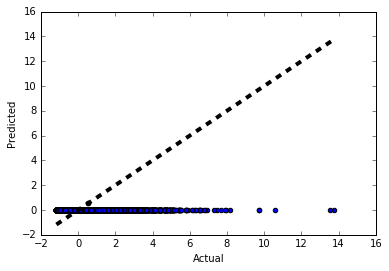

In [117]:
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_predict
from sklearn import linear_model

lr = linear_model.LinearRegression()

y_hat = cross_val_predict(lr, X_train, y_train, cv = 10)

#print("Variance score: %.3f" % lr.score(X_train, y_train))
print("MSE: %.2f" % np.mean((y_hat - y_train) **2))

fig, ax = plt.subplots()
ax.scatter(y_train, y_hat)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [118]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

pipe_lrm = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components = 40)),
                    ('lrm', LinearRegression())])

%time pipe_lrm.fit(X_train, y_train)
print('Variance score: %.3f' % pipe_lrm.score(X_test, y_test))
y_pred = pipe_lrm.predict(X_test)

/Users/GS7271/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype bool was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


CPU times: user 7.25 s, sys: 614 ms, total: 7.87 s
Wall time: 3.08 s
Variance score: -0.000


In [120]:
from sklearn.kernel_ridge import KernelRidge

kr = KernelRidge(alpha = 1.0)
%time kr.fit(X_train, y_train)
y_hat = kr.predict(X_test)
#estimated_coeff = kr.coef_

print("Variance score: %.3f" % kr.score(X_test, y_test))
print("MSE: %.2f" % np.mean((y_hat - y_test) **2))

CPU times: user 3min 6s, sys: 3.54 s, total: 3min 10s
Wall time: 1min 4s
Variance score: -0.000
MSE: 1.00


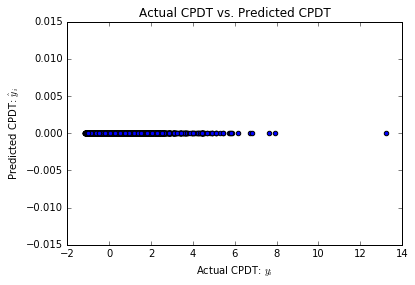

In [122]:
%matplotlib inline

plt.scatter(y_test, y_hat)
plt.xlabel("Actual CPDT: $y_i$")
plt.ylabel("Predicted CPDT: $\hat{y}_i$")
plt.title("Actual CPDT vs. Predicted CPDT")

In [127]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth = 1000, min_weight_fraction_leaf = 0.000001)
%time dtr.fit(X_train, y_train)
y_hat = dtr.predict(X_test)

print("Variance score: %.3f" % dtr.score(X_test, y_test))
print("MSE: %.2f" % np.mean((y_hat - y_test) **2))

CPU times: user 527 ms, sys: 46 ms, total: 573 ms
Wall time: 573 ms
Variance score: -0.000
MSE: 1.00
